# Classification

A very important point that we must pay attention to is that this exercise has two separate datasets, so we must perform the evaluation and training tasks on the first dataset and consider the test dataset only as unseen data.

For creating an AI model,we should follow these phases:
* Preparing the data
* Preprocessing the data
* Learning the model & Evaluating the results
* Predictting real values

# Set up enviroment

In [70]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

import joblib

# for visuallization
import plotly.express as px

# Preparing the data

In [71]:
train=pd.read_csv('C:/Users/IOR_C/OneDrive/Documentos/GitHub/mlops-mobilepc/mobilepc/mobilepc/data/train.csv')
test=pd.read_csv('C:/Users/IOR_C/OneDrive/Documentos/GitHub/mlops-mobilepc/mobilepc/mobilepc/data/test.csv')

In [72]:
dict(train.iloc[0,:])

{'battery_power': 842.0,
 'blue': 0.0,
 'clock_speed': 2.2,
 'dual_sim': 0.0,
 'fc': 1.0,
 'four_g': 0.0,
 'int_memory': 7.0,
 'm_dep': 0.6,
 'mobile_wt': 188.0,
 'n_cores': 2.0,
 'pc': 2.0,
 'px_height': 20.0,
 'px_width': 756.0,
 'ram': 2549.0,
 'sc_h': 9.0,
 'sc_w': 7.0,
 'talk_time': 19.0,
 'three_g': 0.0,
 'touch_screen': 0.0,
 'wifi': 1.0,
 'price_range': 1.0}

### Features:

* __Battery_Power__: Total energy a battery can store in one time measured in mAh
* __Blu__ : Has bluetooth or not
* __Clock_speed__ : speed at which microprocessor executes instructions
* __dual_sim__ : Has dual sim support or not
* __fc__ : Front camera mega pixels
* __four_g__ : Has 4G or not
* __int_memory__ : Internal memory in gigabytes
* __m_dep__ : Mobile depth in cm
* __mobile_wt__ : Weight of mobile phone
* __n_cores__ : Number of cores of processor
* __pc__ : Primary camera mega pixels
* __px_height__ : Pixel resolution height
* __px_width__ : Pixel resolution width
* __ram__ : Random Access Memory in mega bytes
* __Sc_h__: Screen height of mobile in cm
* __Sc_w__ : Screen width of mobile in cm
* __talk_time__ : longest time that a single battery change will last when you are 
* __three_g__ : Has 3G or not
* __touch_screen__ : Has touch screen or not
* __wifi__ : Has wifi or not
* __Price_range__ : This is target variable with value of 0 (low cost),1(medium cost),2(high cost),3(very high cost)

## 1: Data Information

In [73]:
print('trian_shape:',train.shape)
print('test_shape',test.shape)

trian_shape: (2000, 21)
test_shape (1000, 21)


In [74]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [77]:
train.describe(include='all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [78]:
test.describe(include='all')

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [79]:
[x for x in test.columns if x not in train.columns]

['id']

## 2: Feature Charactristics

I devide the features into the numerical and categorical

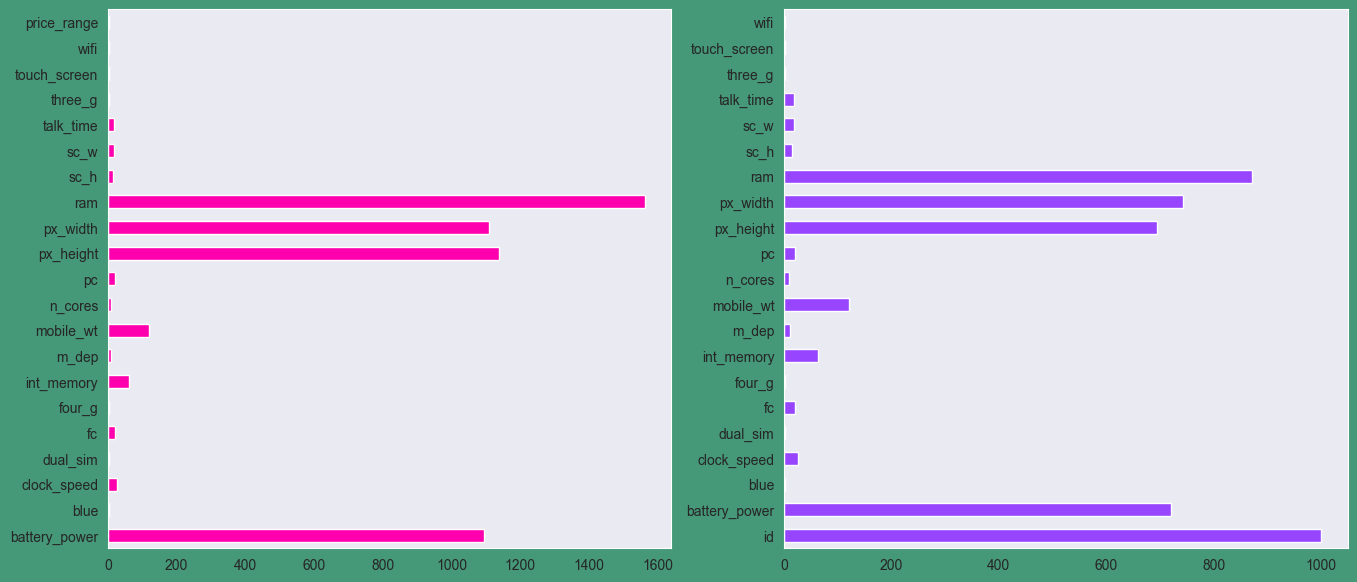

In [80]:
sns.set_style('darkgrid')
color = 'royalblue'

fig, ax = plt.subplots(1, 2, figsize=(16,7),dpi=100,facecolor='#459878')
train.nunique().plot(kind='barh',color='#ff00ae',ax=ax[0],label='train')
ax[0].grid()
test.nunique().plot(kind='barh',color='#9845ff',ax=ax[1],label='test')
ax[1].grid()

1- According to the graphs above, the first thing we see is that the number of ID column values is equal to the total number of test dataset samples, so this column is not suitable for our model. So we should remove it from out dataset

2-  Another point that can be understood from the above diagram is whether the columns are continuous or categorical. If the number of unique data in each column is very high, it can be considered a continuous variable, and if it is the opposite, we consider that column to be categorical.

In [81]:
test.drop('id',inplace=True,axis=1)

3- And another point, according to what was said at the beginning of this notebook, is that it is better that the change interval of the unseen data is the same as the change interval of the train dataset, which can be obtained both from the above chart and from the following charts.

In [82]:
train_without_target=train.drop('price_range',axis=1)

## 3: Visuallization

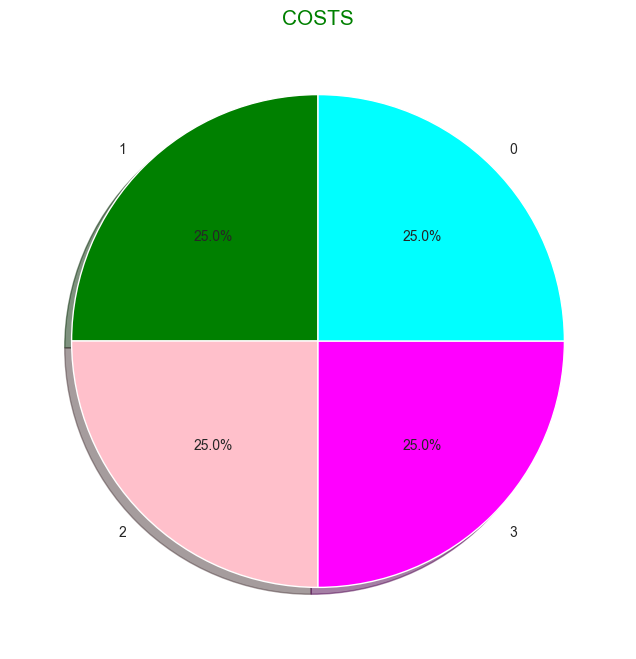

In [83]:
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

We see that our target is *Balanced*. So we can use *Accuracy* metric for evaluationg 

We have a balanced target.

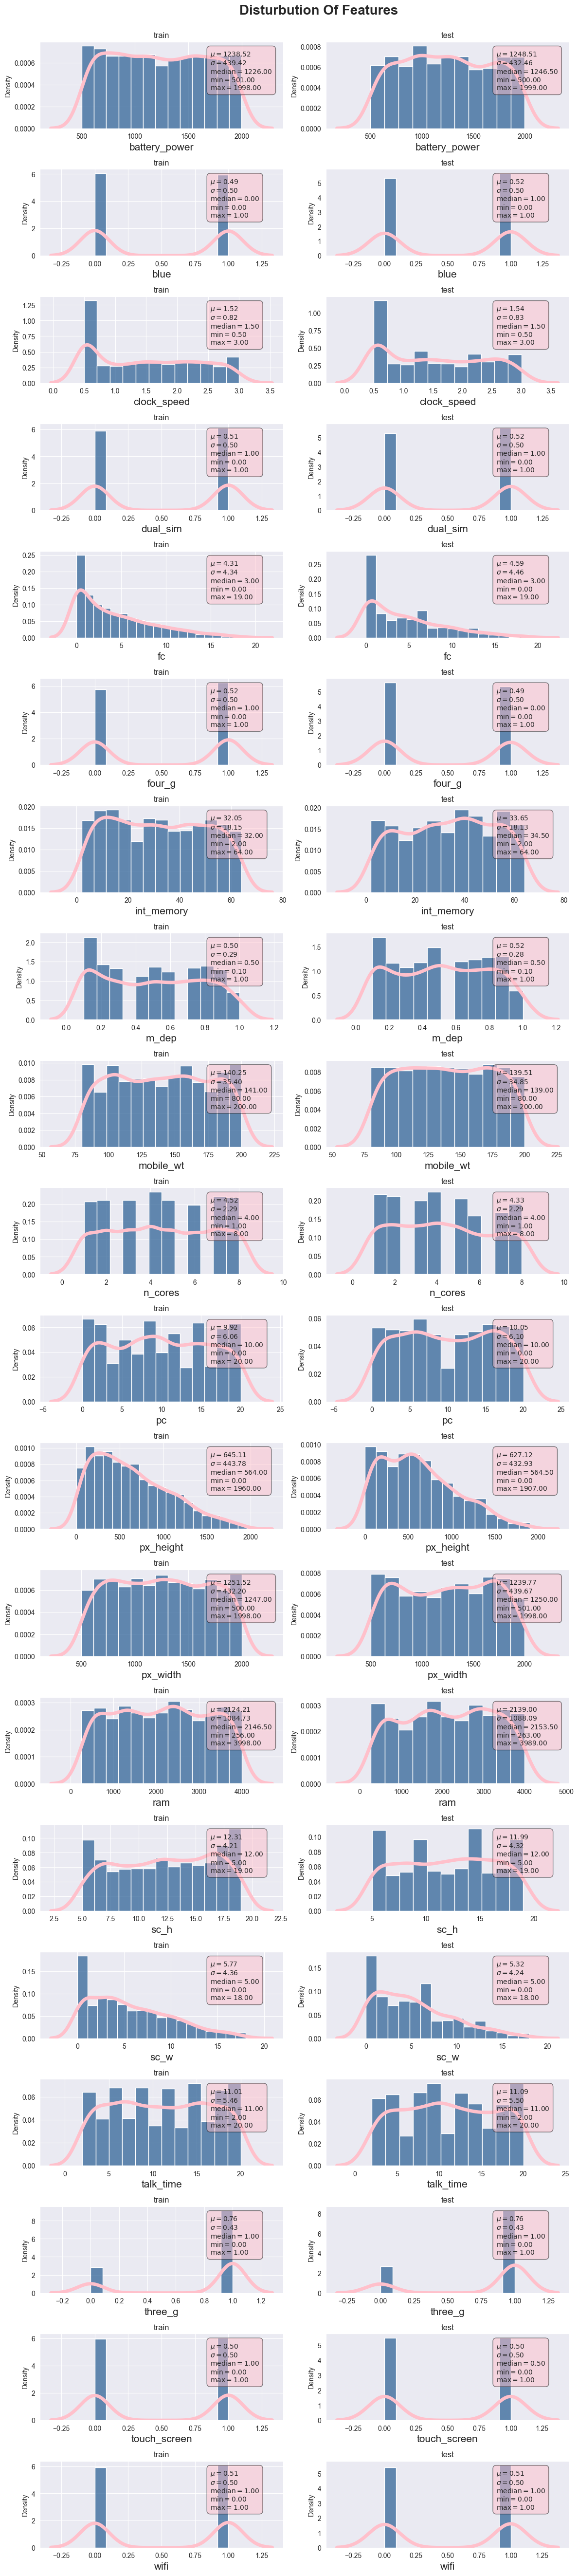

In [84]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(train_without_target.columns.values)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = train_without_target, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = train_without_target, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %train_without_target[col].mean(),
    r'$\sigma=%.2f$' %train_without_target[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(train_without_target[col]),
    r'$\mathrm{min}=%.2f$' %train_without_target[col].min(),
    r'$\mathrm{max}=%.2f$' %train_without_target[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = test, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = test, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %test[col].mean(),
    r'$\sigma=%.2f$' %test[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(test[col]),
    r'$\mathrm{min}=%.2f$' %test[col].min(),
    r'$\mathrm{max}=%.2f$' %test[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
   
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,
    fontweight = "bold")
plt.tight_layout()
plt.show()

We checked each feature distribution in both datasets and came to the conclusion that:
* __The distribution of features in both datasets can be considered similar despite having differences
* __The division of continuous and categorical columns can also be done easily

In [85]:
num_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
cat_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

### 3-1: EDA For Categorical Features

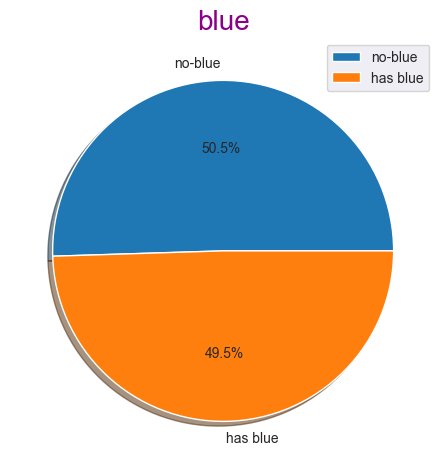

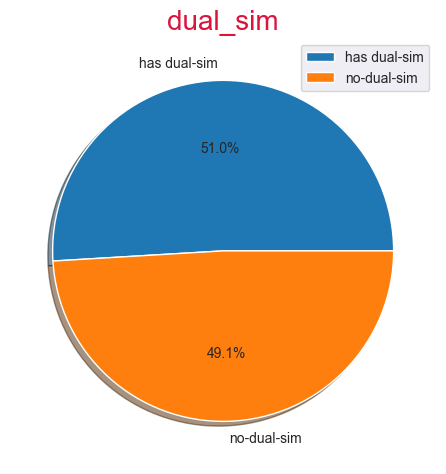

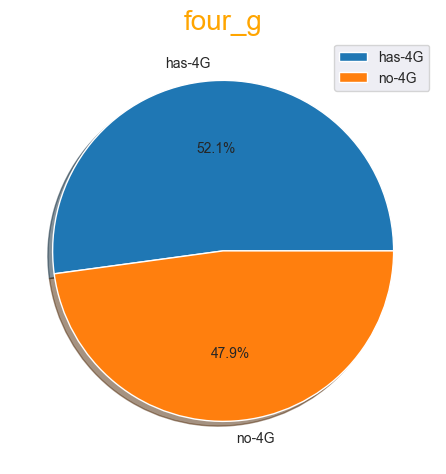

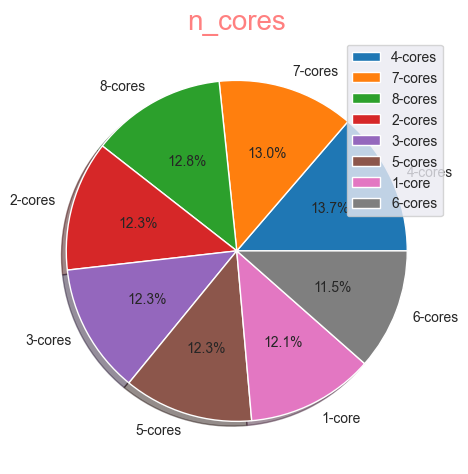

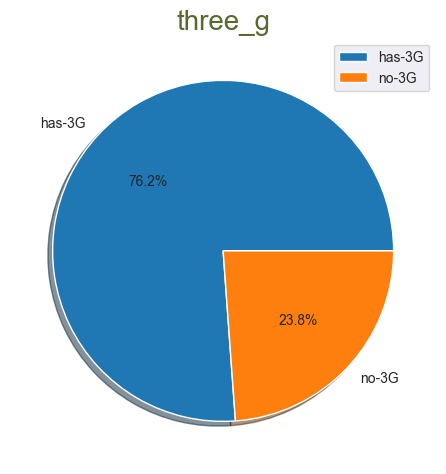

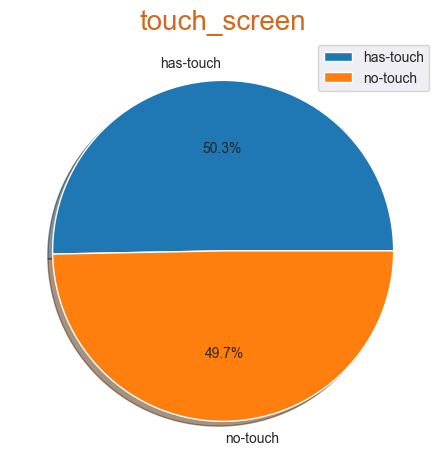

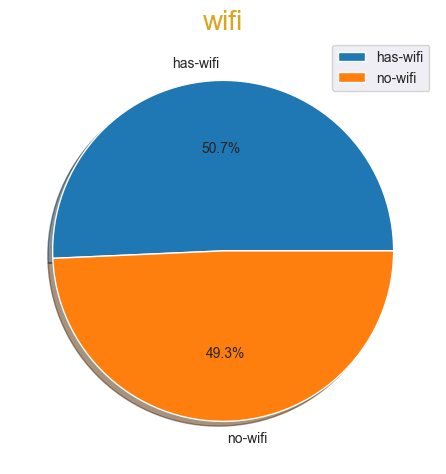

In [86]:

colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520']
new_train=train.replace(to_replace={'blue':[0,1],'dual_sim':[0,1],'four_g':[0,1],
                      'n_cores':[1,2,3,4,5,6,7,8],'three_g':[0,1],'touch_screen':[0,1],'wifi':[0,1]},
           value={'blue':['no-blue','has blue'],
                  'dual_sim':['no-dual-sim','has dual-sim'],
                 'four_g':['no-4G','has-4G'],
                 'n_cores':['1-core','2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'],
                 'three_g':['no-3G','has-3G'],
                 'touch_screen':['no-touch','has-touch'],
                 'wifi':['no-wifi','has-wifi']})
for i,c in enumerate(cat_columns):
    plt.figure(figsize =(5.5, 6.5))
    plt.pie(new_train[c].value_counts() ,labels=list(new_train[c].value_counts().index),shadow = True,autopct='%1.1f%%')
    plt.legend()
    plt.title(c,color=colors_cat[i],fontsize=20)

These features are in both *train* and *test* dataset
* __The number of phones that use Bluetooth is very close to the number of phone whom do not use it
* __Also, the number of phones with two SIM cards is very close to the number of single SIM phones
* __The number of phones with 4G is slightly more than the number of phones without 4G
* __The number of phones with different types of number of cores have an almost equal distribution
* __The number of touch screen and Wi-Fi have the same distribution as above
* __But The number of phones that use 3G is much more than the number of phones that do not use it

### 3-2: EDA For Numerical Features

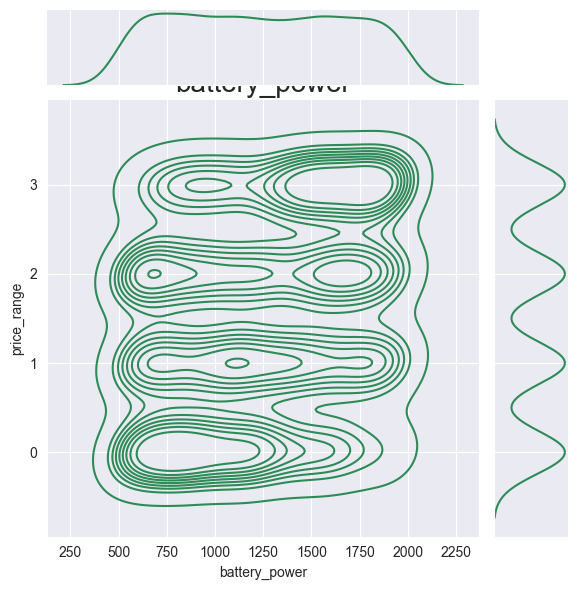

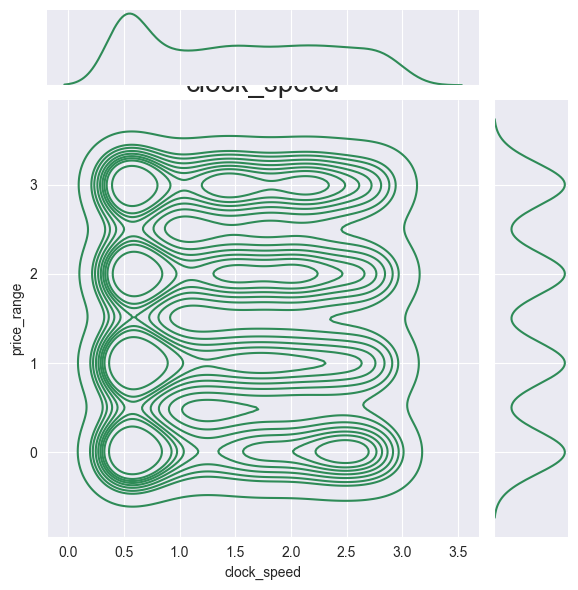

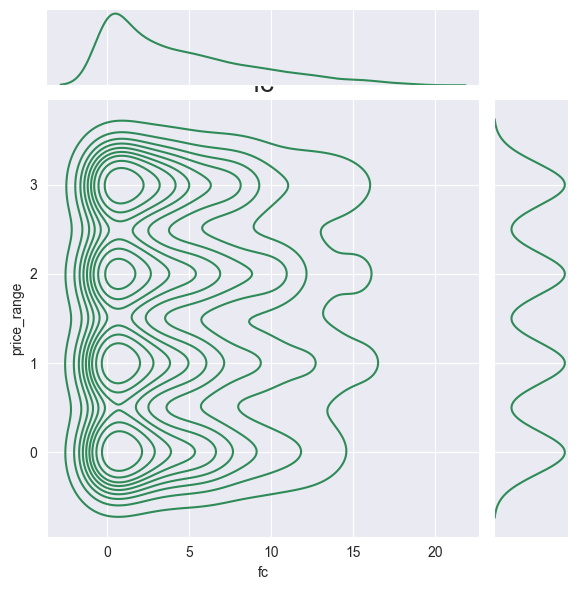

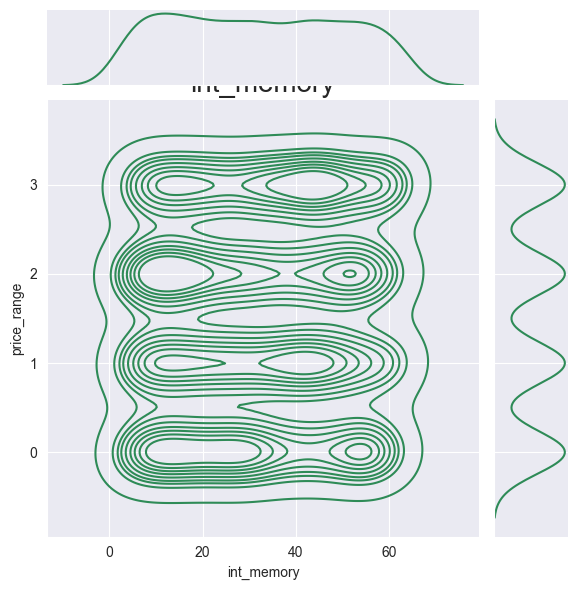

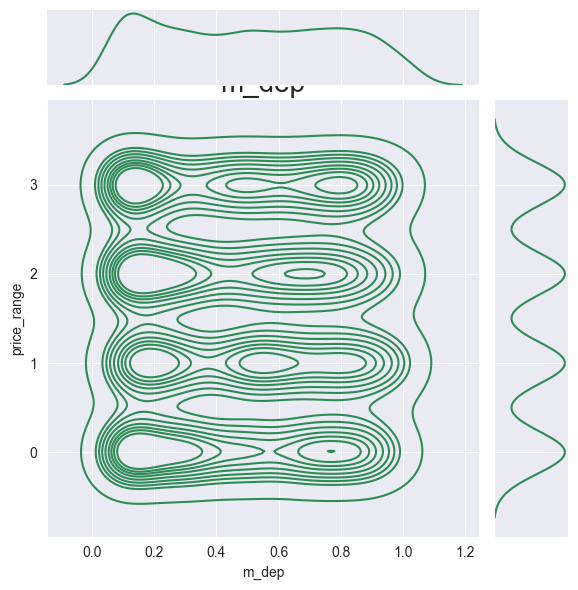

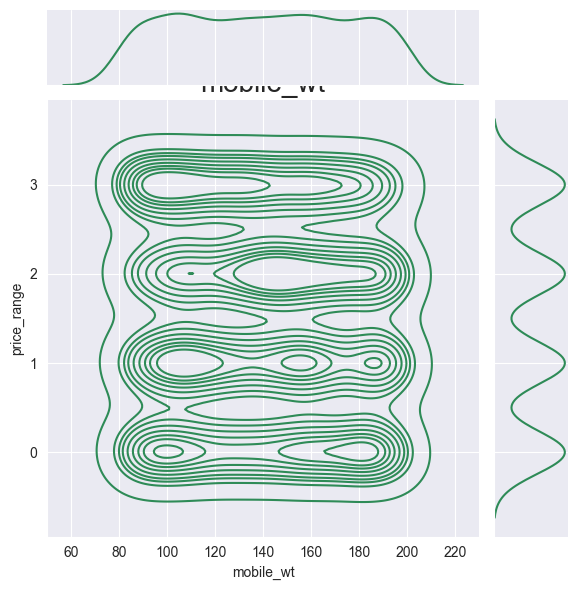

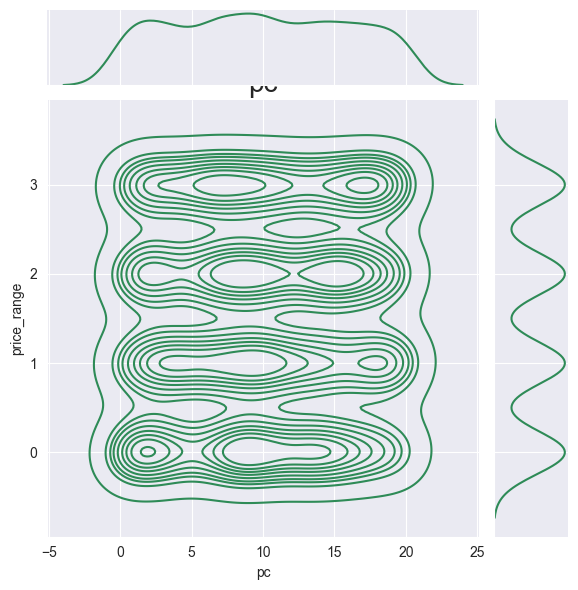

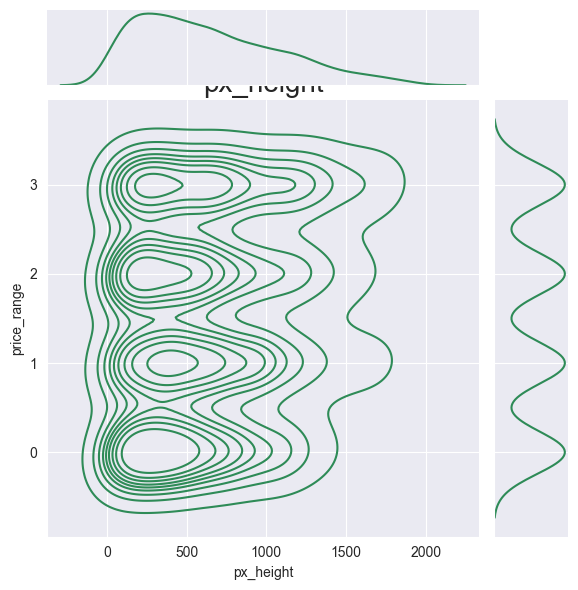

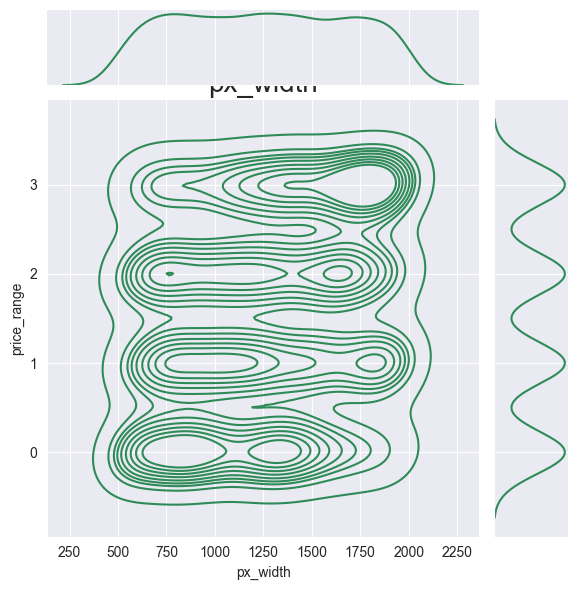

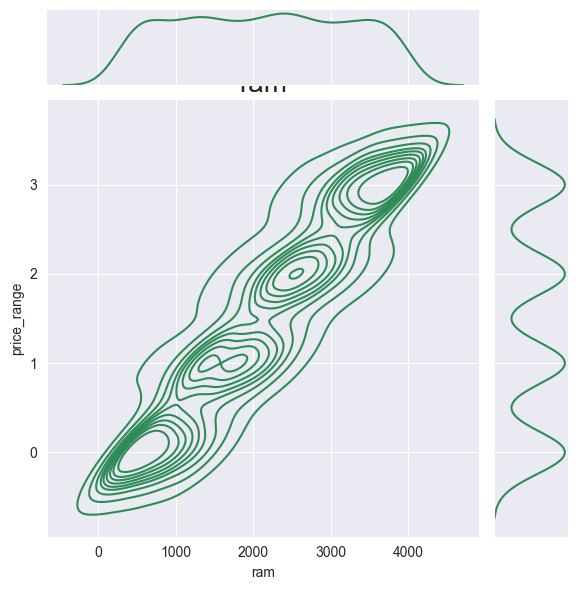

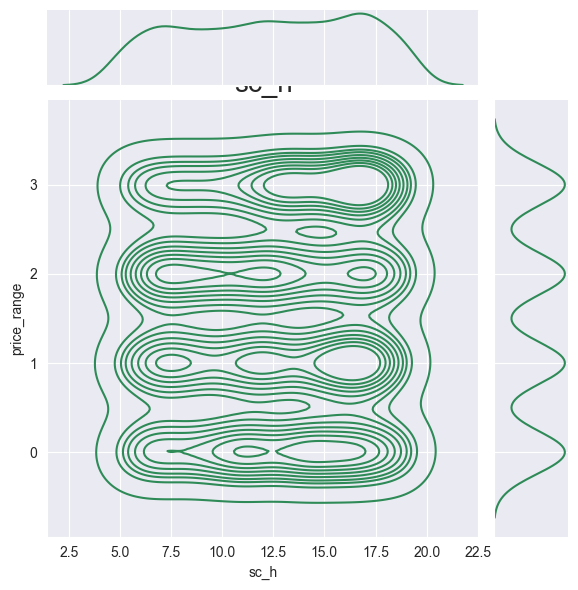

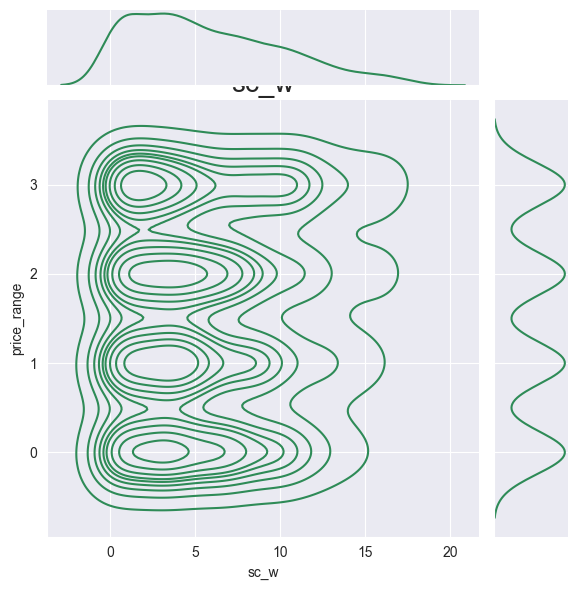

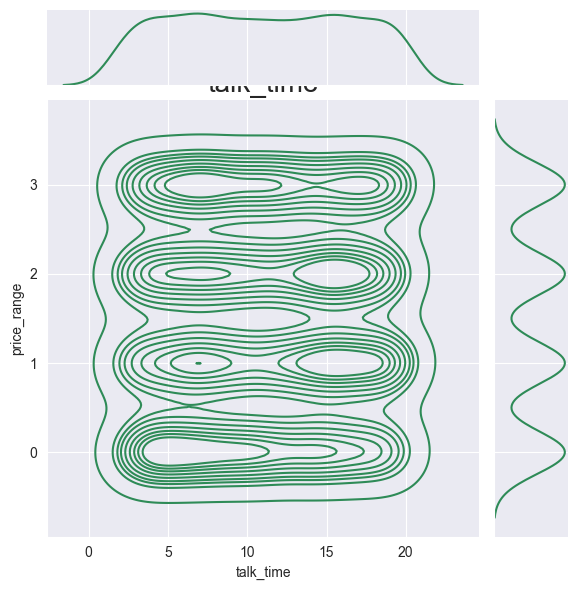

In [87]:
for i,c in enumerate(num_columns):
    sns.jointplot(x=c ,y='price_range',data=train,kind='kde',palette = "dict",color='seagreen')
    plt.xlabel(c)
    plt.ylabel('price_range')
    plt.title(c,fontsize=20)

* __battery_power: The high concentration of phones in the class zero range, below 1500 mAh is evident, And as for the more expensive phones, their battery power is above 1500 mAh, it was the same as we expected.

* __clock_speed: There is a concentration below 1.0 GHz for all groups, However, in all 4 categories, bipolars can also be seen.

* __fc: The same bipolars that we mentioned above are not visible in the case of the front camera

* __int_memory: For class 3 phones, which are also the most expensive, there is a lot of concentration for values above 35 GB for internal memory. On the other hand, cheaper phones usually have lower values for internal memory

* __m_dep: Usually, cheaper phones have less depth and more expensive phones have higher depth

* __mobile_wt: More expensive phones weigh less, but phones in class 2 weigh more. But class 2 have big concentration in higher than 120gr.

* __pc: Class 1 phones have a primary camera less than 15 mega pixels, but class zero phones usually have a higher primary camera. (According to this data set, we obtained this information, it may not be the case in reality)

* __px_height: In all groups the number of phones that have less than 600 pixel in height are more.

* __px_width: In expensive phones, the number of pixels in the width of the phone is higher than 1000 pixels, but in class 1 and 2 phones, this amount is less than 1000 pixels.

* __ram: In general, the more expensive phone has higher ram.

* __sc_h: The height of most class 3 phones is higher than 12 cm, but this feature is not very evident in other classes

* __sc_w: It can be said that unlike the above feature, the width of more expensive phones is less




# B: Preprocessing the data

At this stage, we must check the data from all aspects to decide if there are noise data or outliers in the columns.

## 1: Missing values & Duplicates

In [88]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [89]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

We dont have nay *NaN*s  in both datasets

In [90]:
train.drop_duplicates(inplace=True)
train.shape

(2000, 21)

In [91]:
test.drop_duplicates(inplace=True)
test.shape

(1000, 20)

We dont have nay *Duplicates*s in both datasets

## 2: Noise & Outliers

Noies Detection:

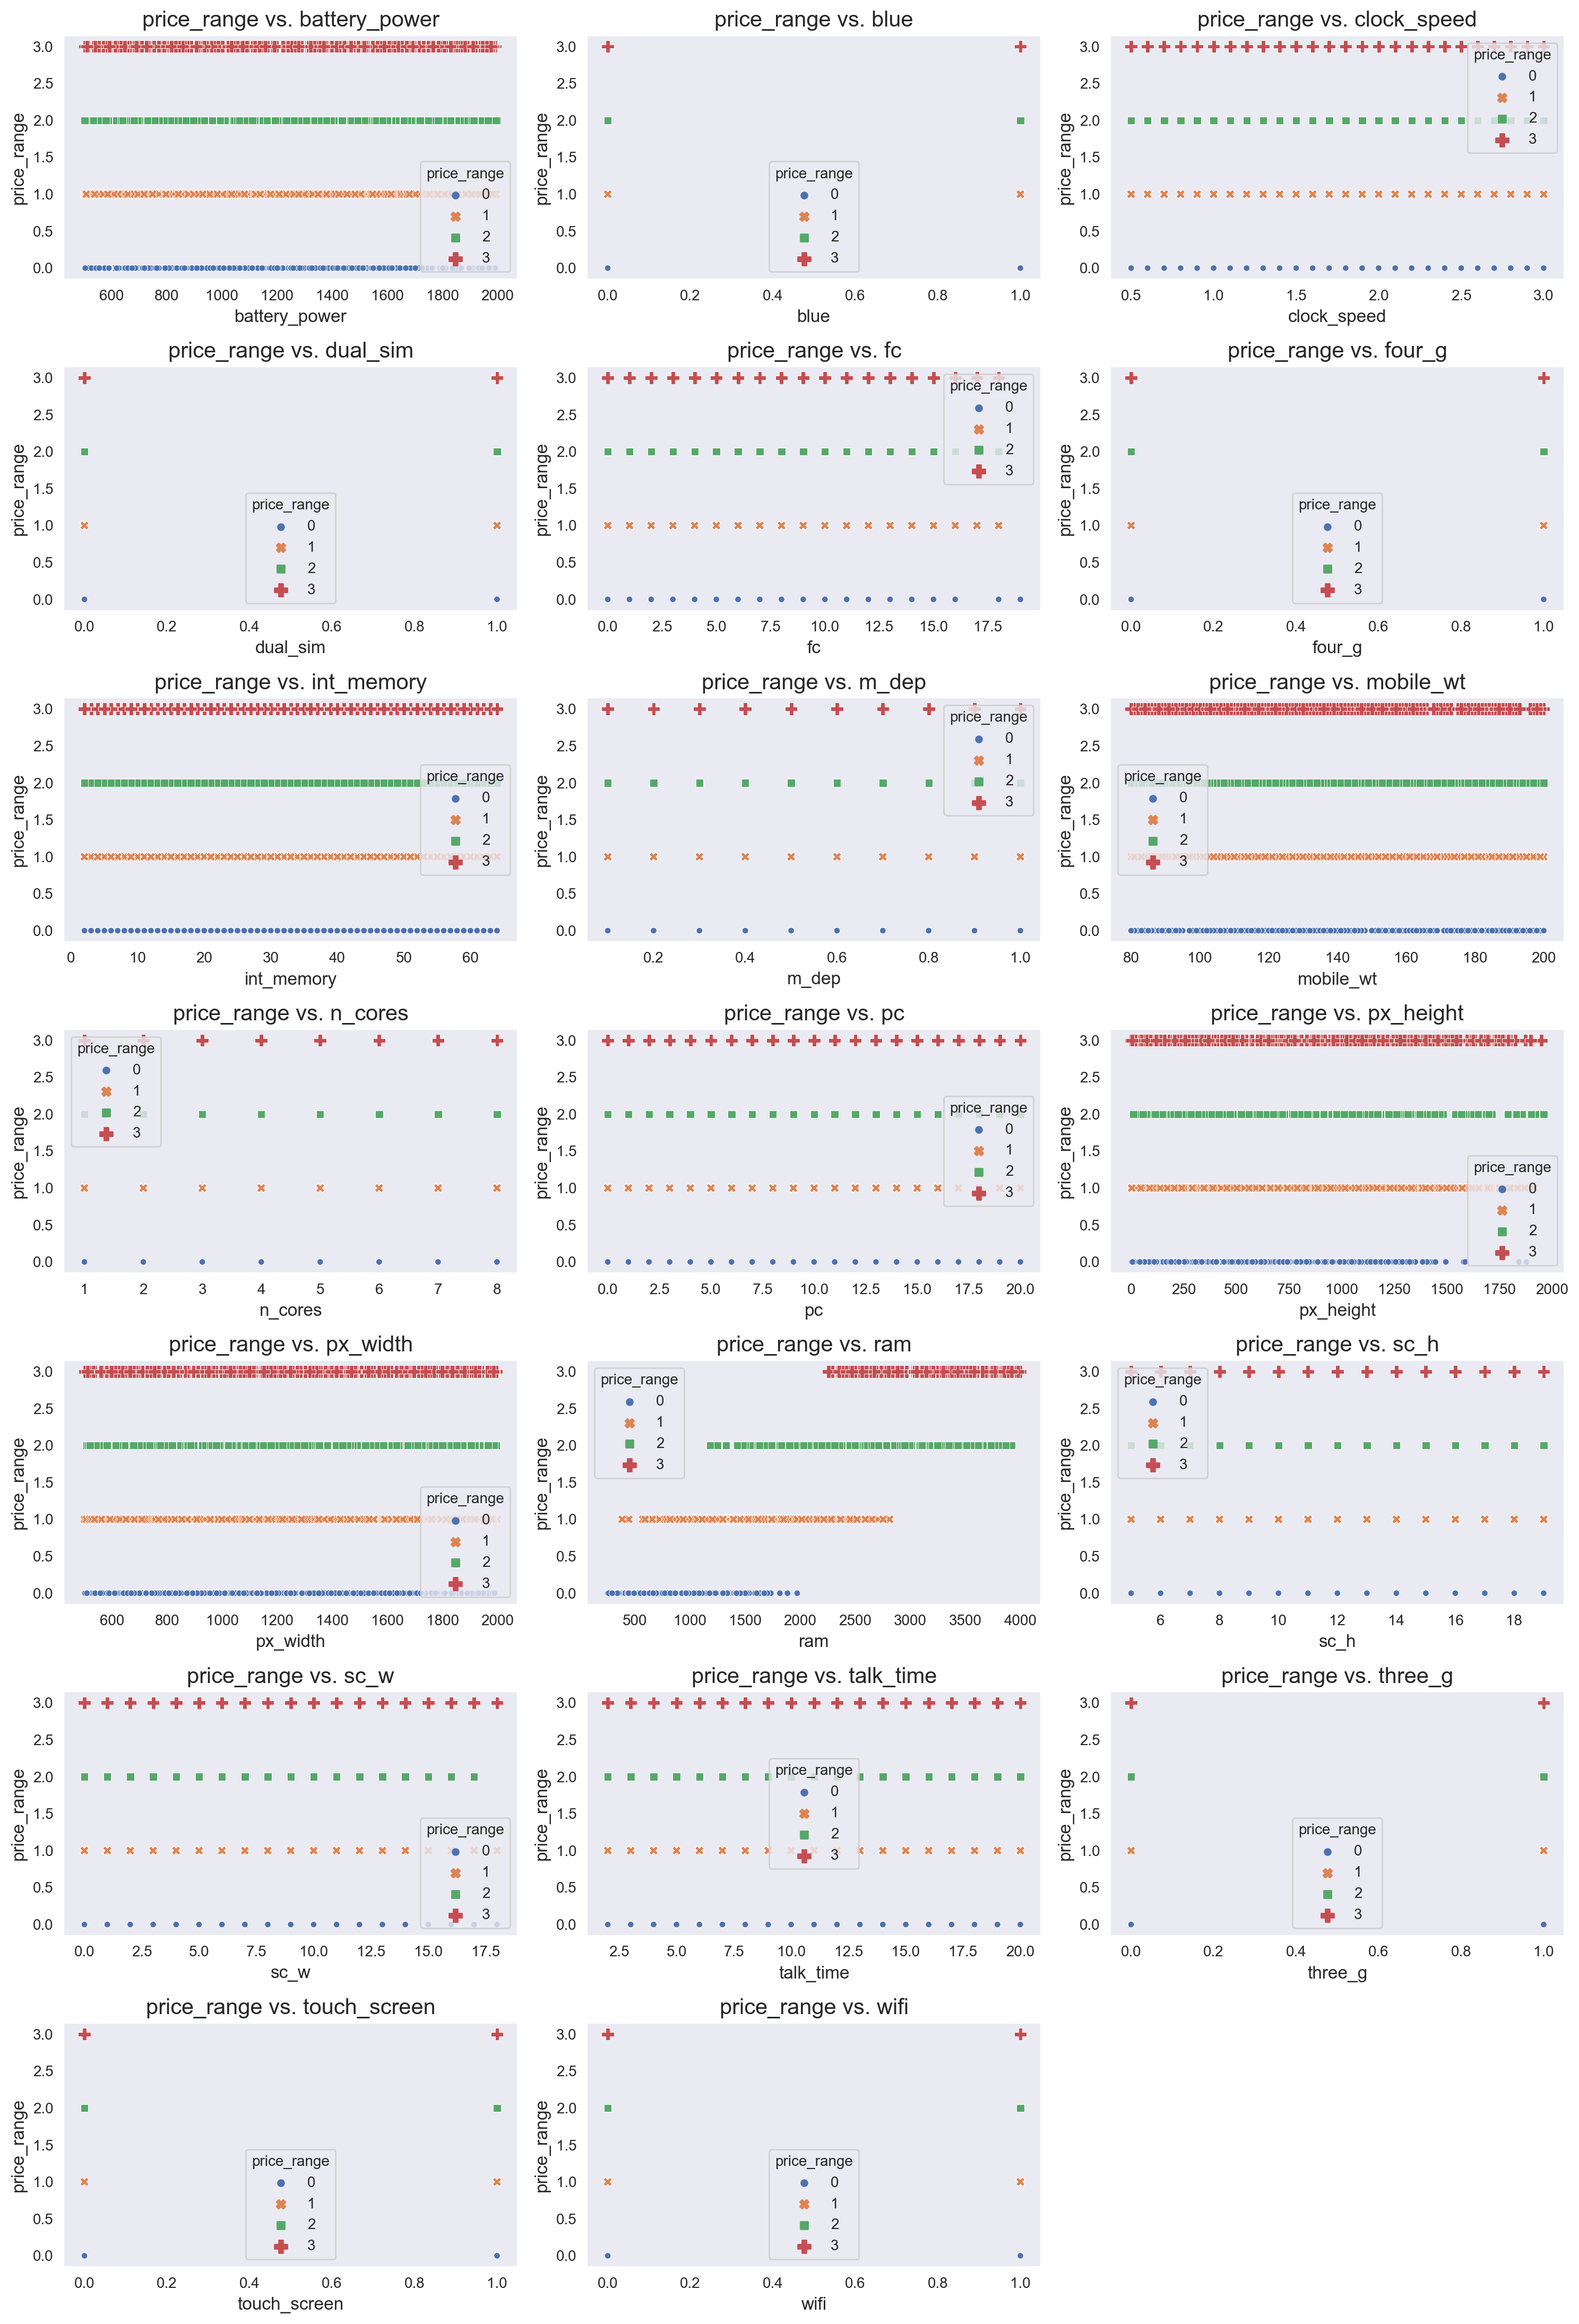

In [92]:
target = 'price_range'
features = train.columns.drop(target)
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=7 ,ncols=3, figsize=(15,22), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=train, x=features[i], y=target,hue=target, ax=ax[x,y],style=target,palette="deep",size=target)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[6, 2].axis('off')

plt.tight_layout()
plt.show()

Features Description:

1-px_width and px_height:

We know that Screen size refers to the physical dimensions of a device’s display, measured in inches or centimeters. Screen resolution, on the other hand, refers to the number of pixels displayed on a screen, measured in pixels per inch (PPI) or pixels per centimeter (PPCM).

To calculate the pixels per inch (PPI) of a specific device, you’ll need to know the resolution of the device’s screen (measured in pixels) and the physical size of the screen (measured in inches). Once you have that, you can use the following formula to calculate PPI:

PPI = (resolution in pixels) / (screen size in inches)

According to the latest Compatibility Definition Document, the definition for screen configurations require that:

* __Screens MUST be at least 2.5 inches in physical diagonal size
* __Density MUST be at least 100 dpi
* __The aspect ratio MUST be between 1.333 (4:3) and 1.779 (16:9)
* __The display technology used consists of square pixels
* __In practical terms, the lowest screen resolution currently being used is QVGA (240x320). There are a couple of phones that use this resolution including the HTC Tattoo and Wildfire. The smallest device I'm aware of is the 2.55" QVGA
* __px_h:320
* __px_w: 240
(It is usually quoted as width × height, with the units in pixels: for example, 1024 × 768 means the width is 1024 pixels and the height is 768 pixels)

Here,we give you one of the smallest mobile in the world:
* __ **Modu phone**:

Dimensions - 75 x 46.5 x 11mm
Memory - removable microSDHC support (2GB, max. 32GB)
Screen - 2.2” resistive touch screen
3G network - HSDPA 3.6Mbps 900/1900/2100 MHz
240 x 320 pixels resolution (QVGA)

Untill here, we found that the minimum value for *px_heigth* is 320 and  for *px_width* is 240. But I found one webpage that introduce some of the small mobile that the smallest value for *px_height* is 217 and for *px_width* is 220

This site: https://ineedlearn.wordpress.com/2020/12/26/width-height-and-dpr-of-cell-phones

In [93]:
#1-
print('train******************************')
print('px_height: ',len(train[(train['px_height']<217)]))
print('px_width: ',len(train[(train['px_width']<220)]))
print('test******************************')
print('px_height: ',len(test[(test['px_height']<217)]))
print('px_width: ',len(test[(test['px_width']<220)]))



train******************************
px_height:  386
px_width:  0
test******************************
px_height:  211
px_width:  0


We wanna replace *px_height* with the minimum value (217). For the moment this code will be commented because this change will be introduced at pipelines transformation flow.

In [94]:
# train['px_height'].replace(train['px_height'][(train['px_height']<217)].values,217,inplace=True)
# test['px_height'].replace(test['px_height'][(test['px_height']<217)].values,217,inplace=True)

2-sc-h and sc-w

the smallest phone in the world has 2.2inch diagonal(5.588 cm) so if we get *train['sc_h'].min()*, we will have minumum value for 
sc_w is about 2.5 cm and if we dont consider this value for *sc_h* is not the smallest value in the world , so we can consider 2.5
for sc_w as minumum 

In [95]:
print('train******************************')
print('px_height: ',len(train[(train['sc_w']<2.5)]))
print('px_width: ',len(train[(train['sc_h']<5)]))
print('test******************************')
print('px_height: ',len(test[(test['sc_w']<2.5)]))
print('px_width: ',len(test[(test['sc_h']<5)]))

train******************************
px_height:  546
px_width:  0
test******************************
px_height:  318
px_width:  0


For the moment this code will be commented because this change will be introduced at pipelines transformation flow.

In [96]:
# train['sc_w'].replace(train['sc_w'][(train['sc_w']<2.5)].values,2.5,inplace=True)
# test['sc_w'].replace(test['sc_w'][(test['sc_w']<2.5)].values,2.5,inplace=True)

After checking the above four columns, it seems that there are no problems with the other columns. Therefore, we continue our work, which is the examination of outliers

In [97]:
# train_dataset
#we dont check the test dataset
outliers_indexes = []
target = 'price_range'

for col in train.select_dtypes(include='object').columns:
    for cat in train[col].unique():
        df1 = train[train[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
        
        
for col in train.select_dtypes(exclude='object').columns:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = train[(train[col] < minimum) | (train[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

494 outliers were identified, whose indices are:

[0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 95, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 169, 176, 179, 182, 207, 212, 219, 222, 224, 226, 227, 229, 230, 231, 246, 250, 251, 254, 263, 269, 279, 286, 289, 290, 291, 296, 298, 300, 301, 303, 305, 307, 308, 310, 311, 314, 322, 325, 326, 327, 328, 329, 330, 334, 335, 343, 344, 349, 351, 352, 356, 360, 362, 364, 370, 372, 373, 378, 380, 387, 390, 391, 392, 406, 412, 413, 416, 423, 424, 431, 439, 440, 442, 443, 445, 449, 456, 463, 469, 470, 471, 474, 477, 478, 482, 488, 493, 496, 500, 505, 507, 508, 511, 515, 518, 523, 537, 539, 547, 550, 555, 558, 560, 561, 563, 564, 565, 567, 568, 577, 584, 588, 589, 590, 592, 595, 602, 610, 611, 614, 615, 616, 627, 636, 640, 643, 645, 649, 650, 666, 672, 673, 685, 687, 691, 692, 694, 698, 701, 704, 708, 715, 722, 723, 724, 725, 728, 731, 735, 736, 740, 741, 749, 754, 755, 757, 766, 781, 783, 

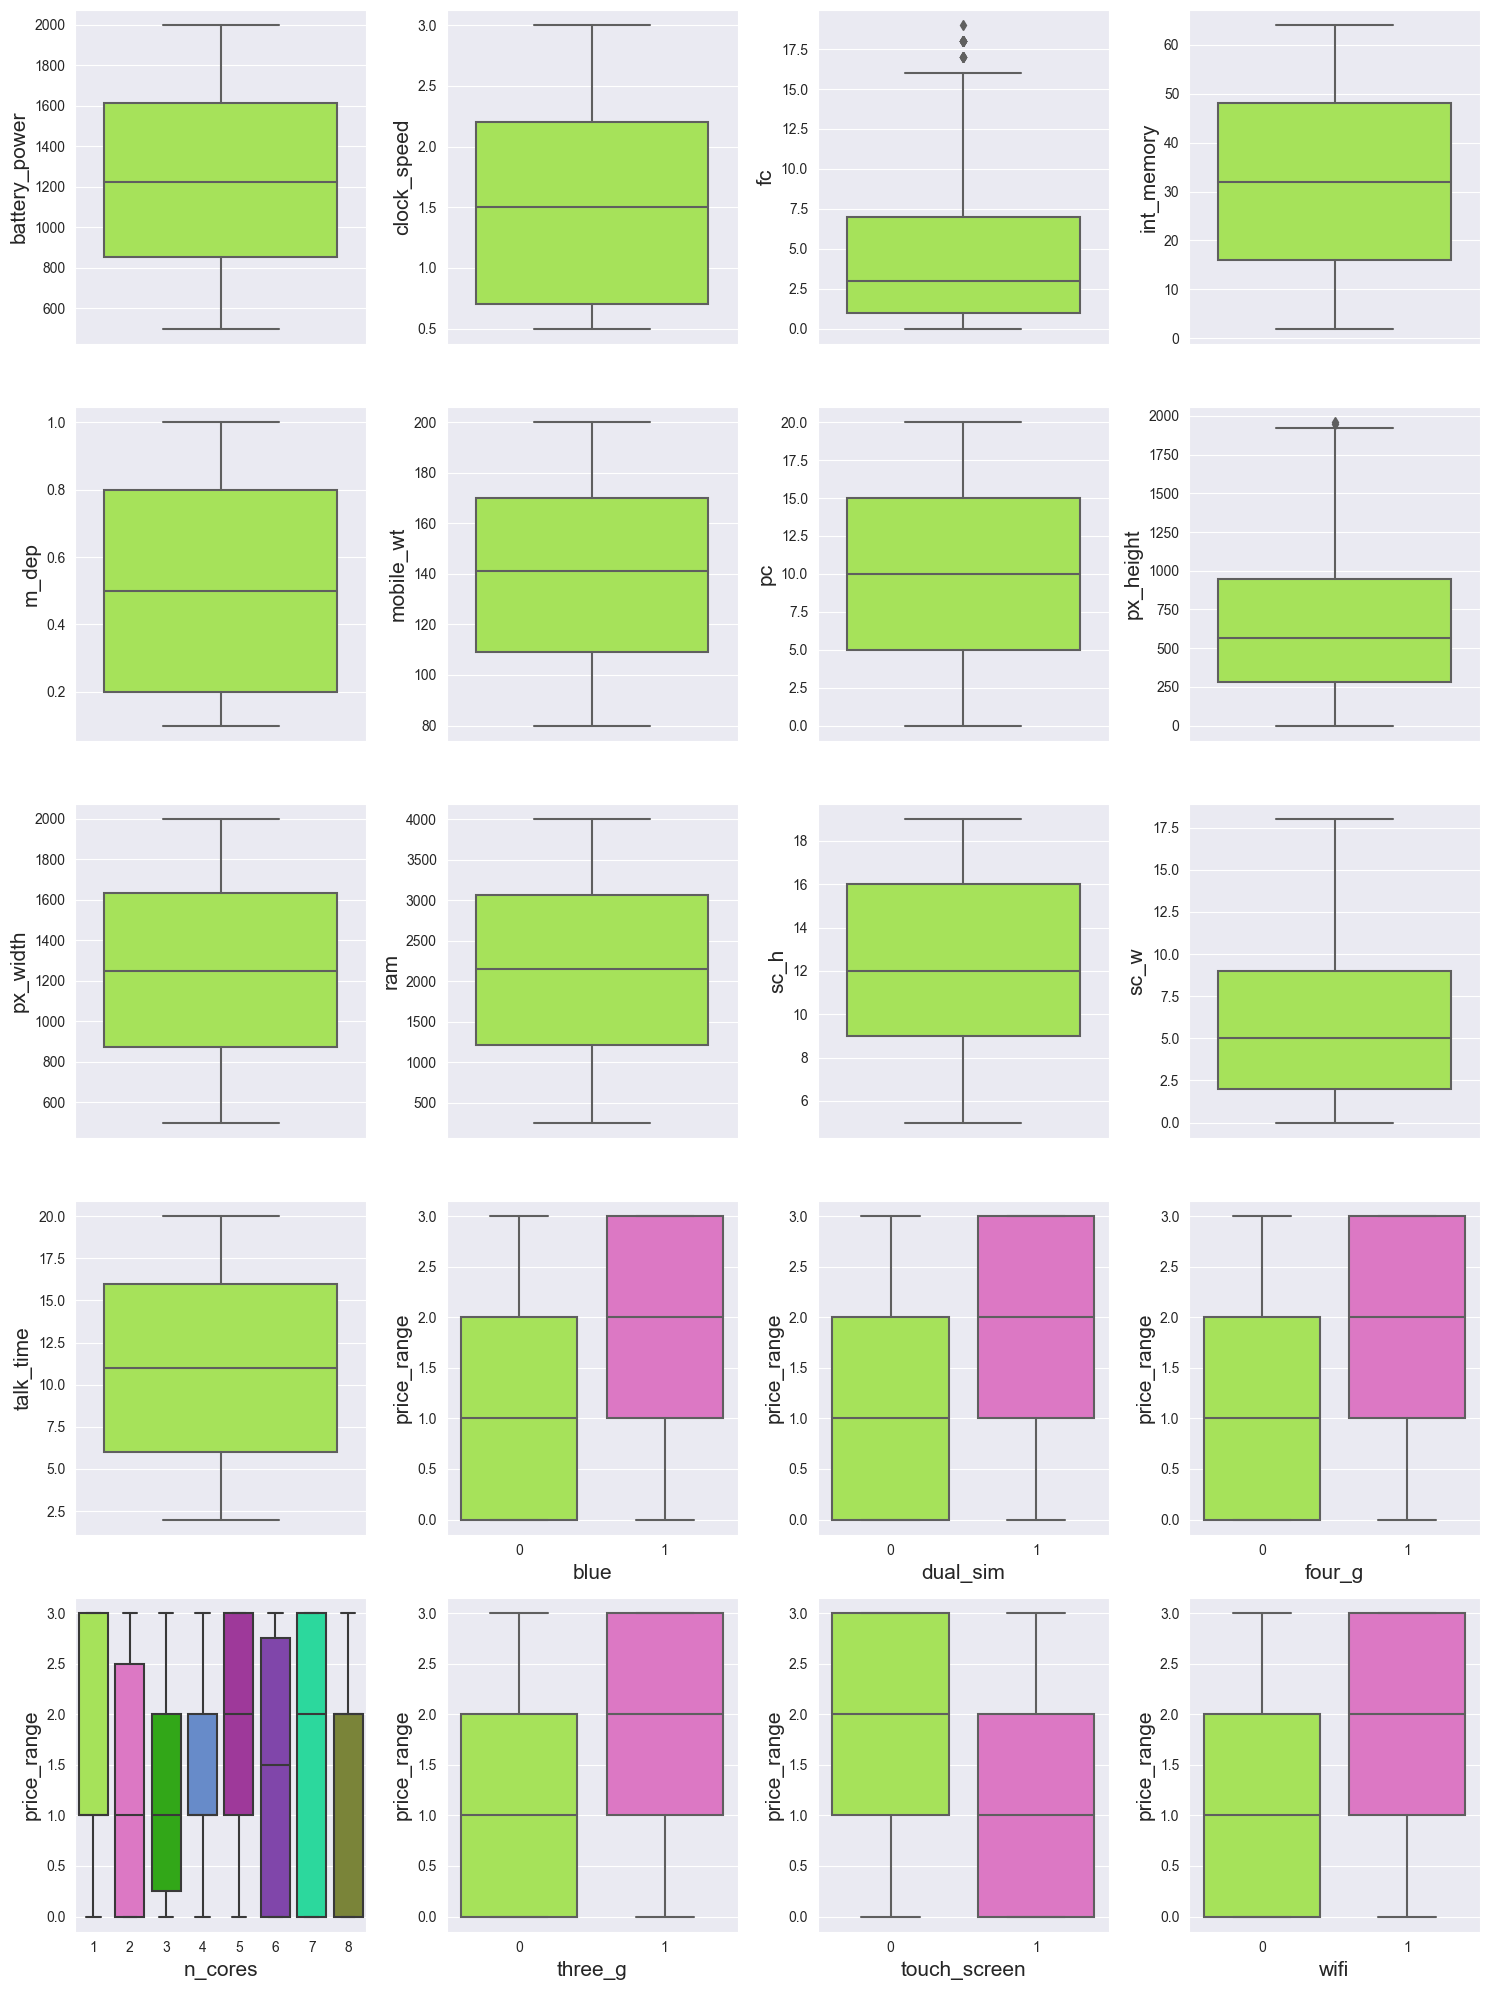

In [98]:
# outlier plots for both continues and categorical features:

sns.set_style('darkgrid')
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da','#af28aa','#8236ba','#0ff5a6','#83912c']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([num_columns,cat_columns])

fig, ax = plt.subplots(5, 4, figsize=(15,20),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<13:
        sns.boxplot(data=train, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=train, x=col, y='price_range', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

According to the definition of the function we had to check the outliers and after checking the box plot diagrams, we see that the number of outliers is very high. Therefore, if we want to remove them, the generalization of the model will be reduced. So we build and evaluate the model with these outliers. If I see that the obtained results are very bad, we will go back and make a decision about these outliers

## 3: Correlation

Text(0.5, 1.0, 'Triangle')

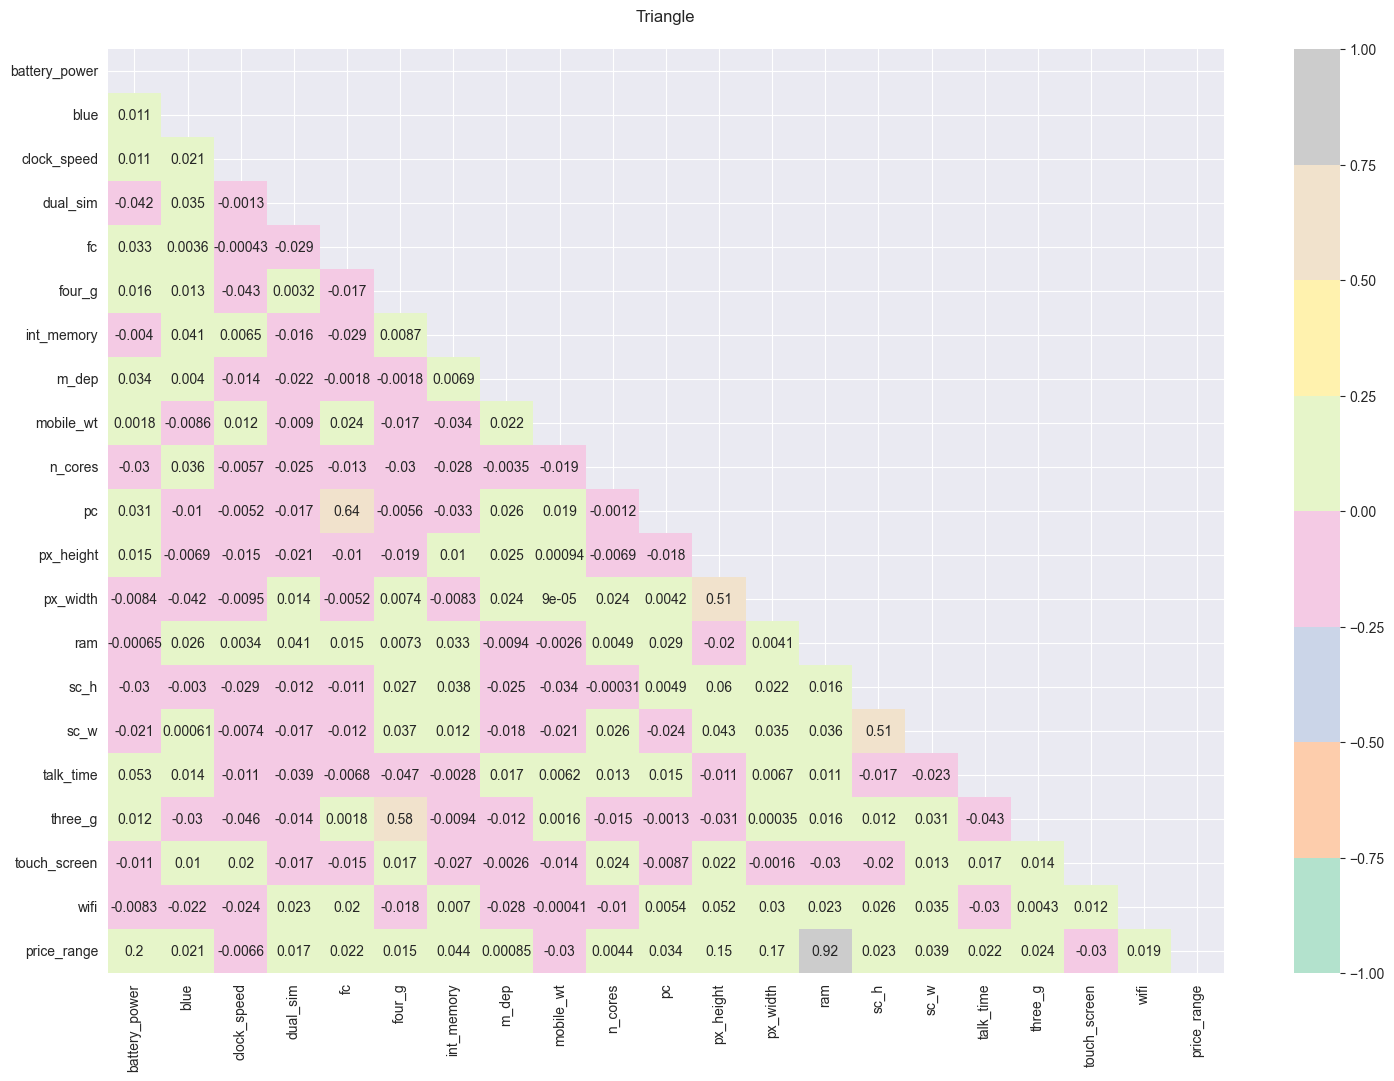

In [99]:
fig,ax=plt.subplots(1,1,figsize=(18,12))
mask=np.triu(np.ones_like(train.corr()))
heatmap=sns.heatmap(train.corr(),vmin=-1,vmax=1,mask=mask,cmap='Pastel2',annot=True)
heatmap.set_title('Triangle',fontdict={'fontsize':12},pad=20)

It can be seen from the above diagram that:

* __1- There is a very high correlation between RAM and target columns, so this column will definitely have a great impact on modeling.
*  __2- There is a relatively high correlation between the PC and FC columns, but not to the extent that we want to remove one of these two. Because you know that if the correlation between two independent columns is high, one of them must be removed for modeling. Because the issue of multicollinearity arises.
* __3- The case mentioned above is also established between the PXHeight and PXWidth columns.
But after making the model, as we discussed about the outliers, if the desired result does not come, we must go back and make a decision about these elements.

All these things are also true about the test dataset

# C: Building pipelines for custom tranformations, cross-validation and training

## Custom Transformers

In [100]:
class OutlierFixTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):

        return None
    
    def fit(self, X, y=None):
   
        if isinstance(X, pd.DataFrame):
            self.perlow = X.quantile(0.03)
            self.perupp = X.quantile(0.97)
        elif isinstance(X, np.ndarray):
            self.perlow = pd.DataFrame(X).quantile(0.03)
            self.perupp = pd.DataFrame(X).quantile(0.97)
        else:
            raise ValueError("Input X must be a pandas DataFrame or a numpy array.")
        return self
    
    def transform(self, X):
        X_copy = pd.DataFrame(X).copy()
        for col in X_copy.columns:
            X_copy[col] = X_copy[col].clip(lower=self.perlow[col], upper=self.perupp[col])
        return X_copy
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def get_feature_names_out(self, input_features=None):
        return input_features
    


class CFixedValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        
        return None
    
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        X_copy = pd.DataFrame(X).copy()
        for col in X_copy.columns:
            if col == 'px_height':
                X_copy[col] = np.where(X_copy[col] < 217, 217, X_copy[col])
            elif col == 'sc_w':
                X_copy[col] = np.where(X_copy[col] < 2.5, 2.5, X_copy[col])
        return X_copy
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def get_feature_names_out(self, input_features=None):
        return input_features



In [101]:
# train['px_height'].replace(train['px_height'][(train['px_height']<217)].values,217,inplace=True)
# train['sc_w'].replace(train['sc_w'][(train['sc_w']<2.5)].values,2.5,inplace=True)

class CFixedValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        
        return None
    
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        X_copy = pd.DataFrame(X).copy()
        for col in X_copy.columns:
            if col == 'px_height':
                X_copy[col] = np.where(X_copy[col] < 217, 217, X_copy[col])
            elif col == 'sc_w':
                X_copy[col] = np.where(X_copy[col] < 2.5, 2.5, X_copy[col])
        return X_copy
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def get_feature_names_out(self, input_features=None):
        return input_features

# Example usage
data = {'sc_w': [5, 10, 1.5, 2.0, 2.5, 3, 3.5, 4.0], #30
        'px_height': [100, 200, 300, 400, 500, 600, 700, 800]}
df = pd.DataFrame(data)

cfix_transformer = CFixedValues()
cfix_transformer.fit(df)
transformed_df = cfix_transformer.transform(df)

print(transformed_df)

   sc_w  px_height
0   5.0        217
1  10.0        217
2   2.5        300
3   2.5        400
4   2.5        500
5   3.0        600
6   3.5        700
7   4.0        800


In [102]:
perlow

col1      7.1
col2    121.0
Name: 0.03, dtype: float64

In [103]:
2.5 <= transformed_df['sc_w'].min()

True

## Building the pipeline

In [106]:
numtr = Pipeline(steps=[
    ('imput_mode', SimpleImputer(strategy='most_frequent')),
    ('outliers', OutlierFixTransformer()),
    ('scaler', StandardScaler())])

sp_num = Pipeline(steps=[
    ('imput_mode', SimpleImputer(strategy='most_frequent')),
    ('outliers', CFixedValues()),
    ('scaler', StandardScaler())])

cattr = Pipeline(steps=[('imput_zero', SimpleImputer(strategy='most_frequent')),
                        ('onehot', OneHotEncoder(dtype='int', handle_unknown='error'))])

In [107]:
coltr = ColumnTransformer(transformers =
            [('numtr', numtr, [x for x in num_columns if x not in ['px_height', 'sc_w']]),
             ('sp_num', sp_num, ['px_height', 'sc_w']),
             ('cat', cattr, ['n_cores'])],
            remainder='passthrough')

In [108]:
# train_t = pd.DataFrame(coltr.fit_transform(train.drop('price_range', axis=1)), index=train.index)
# print(coltr.get_feature_names_out())
# train_t.columns = coltr.get_feature_names_out()
# train_t

# D: Choose the best model & Evaluating the results

At this stage, we have to build several types of models that are suitable for this dataset and finally evaluate them.

* __In this section, we go to the expression of models. In this project, we are going to officially use 3 decision tree models **DT**, random forest **RF** and **SVM**.
* __I present the construction of these models in 3 parts. 
* __In the first part, we present only 3 models without any hyperparameters and express the results through cross-validation iterations. 
* __In the second part, we define a separate function for the best model  and express the results. Of course, in this section, we will set a series of important hyperparameters and see the results.



In [109]:
def evaluate_model(model, X, y, metric='accuracy'):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    
    scoring = {'accuracy' : make_scorer(accuracy_score), 
       'precision' : make_scorer(precision_score, average = 'weighted'),
       'recall' : make_scorer(recall_score, average = 'weighted'), 
       'f1_score' : make_scorer(f1_score, average = 'weighted')}
    
    scores = cross_val_score(model, X, y,
                             scoring=scoring[metric], cv=cv, n_jobs=-1)
    return scores

def get_models():
    models = dict()

    # models['Nearest Neighbor'] = KNeighborsClassifier(3)

    # models['Logistic Regression'] = LogisticRegression(random_state=42, max_iter=1000)

    models['SVC'] = SVC(random_state=42, probability=True)

    # models['MLP'] = MLPClassifier(random_state=1, max_iter=1000)

    models['Decision Tree'] = DecisionTreeClassifier(random_state=42)

    models['Random Forest'] = RandomForestClassifier(random_state=42)

    # models['NB'] = GaussianNB()

    # models['Gradient Boosting'] = GradientBoostingClassifier(random_state=42)

    # models['LightGBM'] = LGBMClassifier(random_state=5)

    # models['AdaBoost'] = AdaBoostClassifier(random_state=42)

    # models['SGD'] = SGDClassifier(random_state=42, class_weight='balanced')

    return models


def highlight(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

## 1: Cross Validation 

In [110]:
Y=train['price_range']
X=train.drop('price_range',axis=1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [112]:
models = get_models()
models

{'SVC': SVC(probability=True, random_state=42),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42)}

In [113]:
# Evaluar los modelos y guardar los resultados
results = pd.DataFrame()
ragg = pd.DataFrame()
mmetrics = pd.DataFrame()
conmat = pd.DataFrame()
ftd_models = dict()

for name, model_or in models.items():
  print(f'----------------------------------------------------------------------------------')
  print(f'-------------------------Model: {name}--------------------------------------------')
  print(f'----------------------------------------------------------------------------------')
  for m in ['accuracy', 'recall', 'precision', 'f1_score']:
    print(f'-----------------------Metric {m} --------------------------------')
    model = Pipeline(steps = [ # Se utiliza el pipeline desarrollado anteriormente para transformar todas las variables antes de su ajuste en el modelo
               ('preprocessor', coltr)
              ,('regressor', model_or)])
    %time scores = evaluate_model(model, X_train, y_train, m)
    dfi = pd.DataFrame({'scores': scores})
    dfi['metric'] = m
    dfi['model'] = name
    results = pd.concat([results, dfi])
    ragg = pd.concat([ragg,pd.DataFrame({'Model': [name],
                                     'metric': [m], 
                                     'avg': [np.mean(scores)], 
                                     'stdmetric': [np.std(scores)]})])
    print('* %s Score = %.3f StdDev = (%.3f)' % (name, np.mean(scores), np.std(scores)), '\n')
  modelo = model.fit(X_train, y_train)
  ftd_models[name] = modelo
  pred = modelo.predict(X_test)
  mmetrics = pd.concat([mmetrics, pd.DataFrame({'Model': [name],
                                           'Acurracy': [accuracy_score(y_test, pred)], 
                                           'Recall': [recall_score(y_test, pred, average='weighted')], 
                                           'Precision': [precision_score(y_test, pred, average='weighted')], 
                                           'F1_score': [f1_score(y_test, pred, average='weighted')]})])
  dfi = (pd.DataFrame(
      confusion_matrix(y_test, pred)).reset_index().rename(columns={
          'index': 'real', 0: '0_pred', 1: '1_pred'}))
  dfi['model'] = name
  conmat = pd.concat([conmat, dfi])
  probs = model.predict_proba(X_test)[:,1]
  dfi['model'] = name

----------------------------------------------------------------------------------
-------------------------Model: SVC--------------------------------------------
----------------------------------------------------------------------------------
-----------------------Metric accuracy --------------------------------


CPU times: total: 0 ns
Wall time: 3.59 s
* SVC Score = 0.889 StdDev = (0.038) 

-----------------------Metric recall --------------------------------
CPU times: total: 15.6 ms
Wall time: 1.77 s
* SVC Score = 0.889 StdDev = (0.038) 

-----------------------Metric precision --------------------------------
CPU times: total: 15.6 ms
Wall time: 886 ms
* SVC Score = 0.893 StdDev = (0.035) 

-----------------------Metric f1_score --------------------------------
CPU times: total: 15.6 ms
Wall time: 896 ms
* SVC Score = 0.889 StdDev = (0.037) 

----------------------------------------------------------------------------------
-------------------------Model: Decision Tree--------------------------------------------
----------------------------------------------------------------------------------
-----------------------Metric accuracy --------------------------------
CPU times: total: 0 ns
Wall time: 308 ms
* Decision Tree Score = 0.818 StdDev = (0.026) 

-----------------------Metric recall -

In [114]:
dfp = pd.pivot_table(ragg, index='Model', columns='metric', values='avg').reset_index()
dfp.columns = ['Model',	'Acurracy',	'F1_score',	'Precision', 'Recall']
dfp['Tipo'] = 'Valid'
dfp = pd.concat([dfp, mmetrics.assign(Tipo='Test')])
dfp = dfp.sort_values(['Model', 'Tipo'], ascending=False)
dfp = dfp[['Model', 'Tipo',	'Acurracy',	'F1_score',	'Precision', 'Recall']]
dfp = pd.melt(dfp, id_vars=['Model', 'Tipo'])
dfp = pd.pivot_table(dfp, index=['Tipo', 'variable'], values='value', columns='Model')
dfp = dfp.style.apply(highlight,axis=1)
dfp

According to the results obtained from the above modeling, the SVM model has obtained the best result. Therefore, we choose this model as our main model for the next step, which is to predict the actual values. But we must pay attention to the fact that we may achieve better results by adjusting hyperparameters in other models, which makes us choose it as our main model. So, the SVM model has been selected so far.

## 2: Setting Some Hyperparameters for the best model

In [115]:
mpipe = Pipeline(steps=[
                ('coltr', coltr),
                ('SVM', SVC(random_state=42, probability=True))])

In [116]:
search_random_grid = {'SVM__C': list(range(1,150)), 
                      'SVM__gamma': [1, 0.1, 0.001, 0.0001, 0.00001], 
                      'SVM__kernel': ['linear', 'rbf', 'poly'], 
                      'SVM__degree': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [117]:
search_obj = RandomizedSearchCV(estimator=mpipe, 
                                param_distributions = search_random_grid, 
                                n_iter=50,
                                scoring='accuracy',
                                cv=StratifiedKFold(n_splits=5),
                                verbose=True,
                                random_state=0,
                                n_jobs= -1)

fit_obj = search_obj.fit(X_train, y_train)
print(fit_obj.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'SVM__kernel': 'linear', 'SVM__gamma': 0.0001, 'SVM__degree': 3, 'SVM__C': 33}


These are the selected hyperparameters:

{'SVM__kernel': 'linear', 'SVM__gamma': 0.0001, 'SVM__degree': 4, 'SVM__C': 42}

In [118]:
mpipe = Pipeline(steps=[
                ('coltr', coltr),
                ('SVM', SVC(**{'kernel': 'linear', 'gamma': 0.0001, 'degree': 4, 'C': 42}))])

# E: Predictting real values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

mpipe.fit(X_train, y_train)

y_pred2 = mpipe.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9525

In [120]:
clf3=SVC()

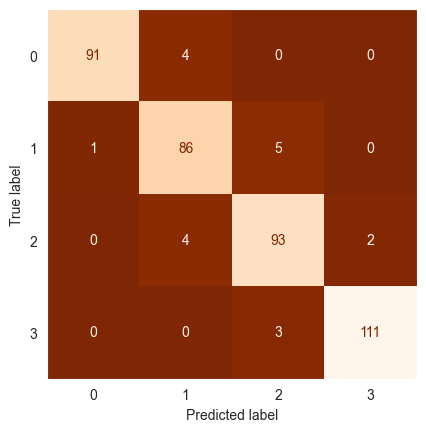

In [121]:
ConfusionMatrixDisplay.from_estimator(mpipe, X_test, y_test, colorbar=False, cmap='Oranges_r')
plt.grid(False)

* __The numbers on the main diagonal are correct and as we can see, they are much more than the numbers on the minor diagonals.

In [122]:
test['price_range']=mpipe.predict(test);test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12     7   
1      0.8        191        5  ...        746       857  3895     6     0   
2      0.9        186        3  ...       1270      1366  2396    17    10   
3      0.5         96        8  ...        295      1752  3893    10     0   
4      0.5        108        6  ...        749       810  1773    15     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
995    0.5        170        7  ...        644       913  2121    14     8   
996    0.9        186        4  ...       1152      1632  1933     8     1   
997    0.5         80        1  ...        477       825  1223     5     0   
998    0.4        171        2  ...         38       832  2509    15    11   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0            2  
1            7        1             0     0            3  
2           10        0             1     1            2  
3            7        1             1     0            3  
4            7        1             0     1            1  
..         ...      ...           ...   ...          ...  
995         15        1             1     0            2  
996         19        0             1     1            1  
997         14        1             0     0            0  
998          6        0             1     0            2  
999          3        1             0     1            2  

[1000 rows x 21 columns]

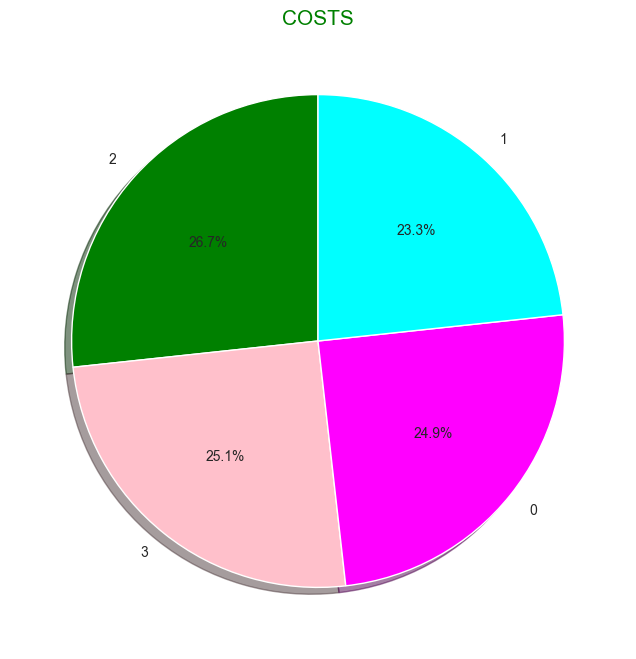

In [123]:
labels = test["price_range"].value_counts().index
sizes = test["price_range"].value_counts()
colors = ['green','pink','magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

Well, interesting results were obtained. As can be seen, unlike the train dataset, where the groups were completely equal, this is not the case in the test dataset.

Most of the phones are in group 3. After that, class 2 phones are more than others. In the third category are class zero phones and at the end are class one phones

# Saving model pipe

In [124]:
joblib.dump(mpipe, "svm_class_mobilepc.pkl")

['svm_class_mobilepc.pkl']

Testing model after loading it:

In [125]:
model = joblib.load("svm_class_mobilepc.pkl")

In [175]:
dict(test.iloc[150,:])

{'battery_power': 976.0,
 'blue': 0.0,
 'clock_speed': 2.0,
 'dual_sim': 0.0,
 'fc': 0.0,
 'four_g': 1.0,
 'int_memory': 5.0,
 'm_dep': 0.9,
 'mobile_wt': 184.0,
 'n_cores': 7.0,
 'pc': 14.0,
 'px_height': 496.0,
 'px_width': 797.0,
 'ram': 3261.0,
 'sc_h': 8.0,
 'sc_w': 2.0,
 'talk_time': 6.0,
 'three_g': 1.0,
 'touch_screen': 1.0,
 'wifi': 1.0,
 'price_range': 2.0}

In [174]:
dict(test.iloc[100,:])

{'battery_power': 559.0,
 'blue': 1.0,
 'clock_speed': 0.5,
 'dual_sim': 1.0,
 'fc': 0.0,
 'four_g': 1.0,
 'int_memory': 24.0,
 'm_dep': 0.8,
 'mobile_wt': 103.0,
 'n_cores': 4.0,
 'pc': 5.0,
 'px_height': 537.0,
 'px_width': 627.0,
 'ram': 2023.0,
 'sc_h': 14.0,
 'sc_w': 1.0,
 'talk_time': 2.0,
 'three_g': 1.0,
 'touch_screen': 0.0,
 'wifi': 0.0,
 'price_range': 1.0}

In [158]:
# {"battery_power": 976.0,
#  "blue": 0.0,
#  "clock_speed": 2.0,
#  "dual_sim": 0.0,
#  "fc": 0.0,
#  "four_g": 1.0,
#  "int_memory": 5.0,
#  "m_dep": 0.9,
#  "mobile_wt": 184.0,
#  "n_cores": 7.0,
#  "pc": 14.0,
#  "px_height": 496.0,
#  "px_width": 797.0,
#  "ram": 3261.0,
#  "sc_h": 8.0,
#  "sc_w": 2.0,
#  "talk_time": 6.0,
#  "three_g": 1.0,
#  "touch_screen": 1.0,
#  "wifi": 1.0,
#  "price_range": 2.0}

{"battery_power": 559.0,
 "blue": 1.0,
 "clock_speed": 0.5,
 "dual_sim": 1.0,
 "fc": 0.0,
 "four_g": 1.0,
 "int_memory": 24.0,
 "m_dep": 0.8,
 "mobile_wt": 103.0,
 "n_cores": 4.0,
 "pc": 5.0,
 "px_height": 537.0,
 "px_width": 627.0,
 "ram": 2023.0,
 "sc_h": 14.0,
 "sc_w": 1.0,
 "talk_time": 2.0,
 "three_g": 1.0,
 "touch_screen": 0.0,
 "wifi": 0.0,
 "price_range": 1.0}

In [170]:
model.predict(test.iloc[[150]])

array([2], dtype=int64)